In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import numpy as np

2022-06-14-01.json
2022-06-14-07.json
2022-06-14-13.json
2022-06-28-01.json
2022-06-28-07.json
2022-07-15-06.json
2022-07-15-12.json
2022-07-20-01.json
2022-07-26-01.json
2022-08-02-01.json
2023-01-09-28.json
2023-01-17-01.json
2023-01-19-01.json
2023-01-19-08.json
2023-01-19-15.json
2023-01-19-22.json
2023-01-23-01.json
2023-01-23-08.json
2023-01-23-15.json
2023-01-23-21.json
2023-03-07-01.json
2022-12-21-06.json
2023-01-05-01.json
2023-01-05-18.json
2023-01-06-01.json
2023-01-06-08.json
2023-01-06-15.json
2023-01-09-08.json
2023-01-09-15.json
2023-01-09-22.json
2023-01-10-07.json
2023-01-10-14.json
2023-01-13-07.json
2023-01-16-01.json
2023-01-16-08.json
2023-01-16-15.json
2023-01-16-22.json
2023-01-17-07.json
2023-01-17-14.json
2023-01-18-01.json
ADAL


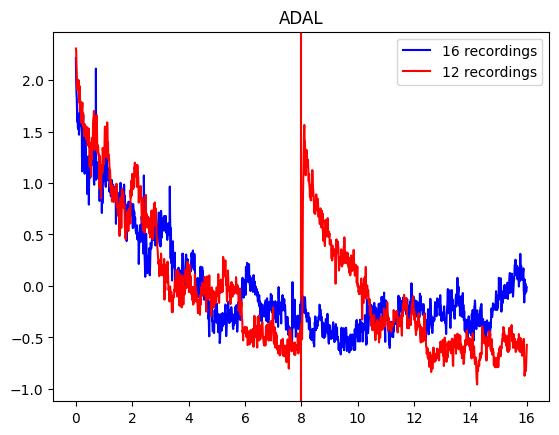

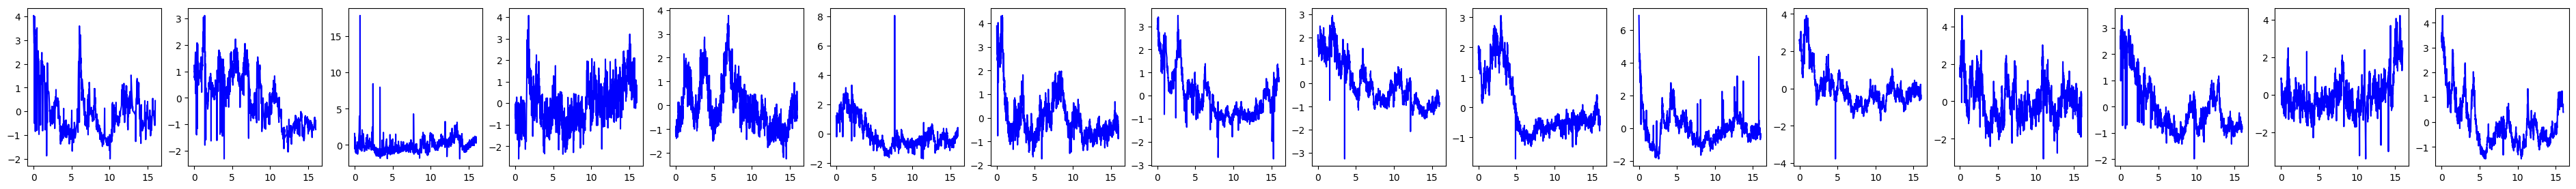

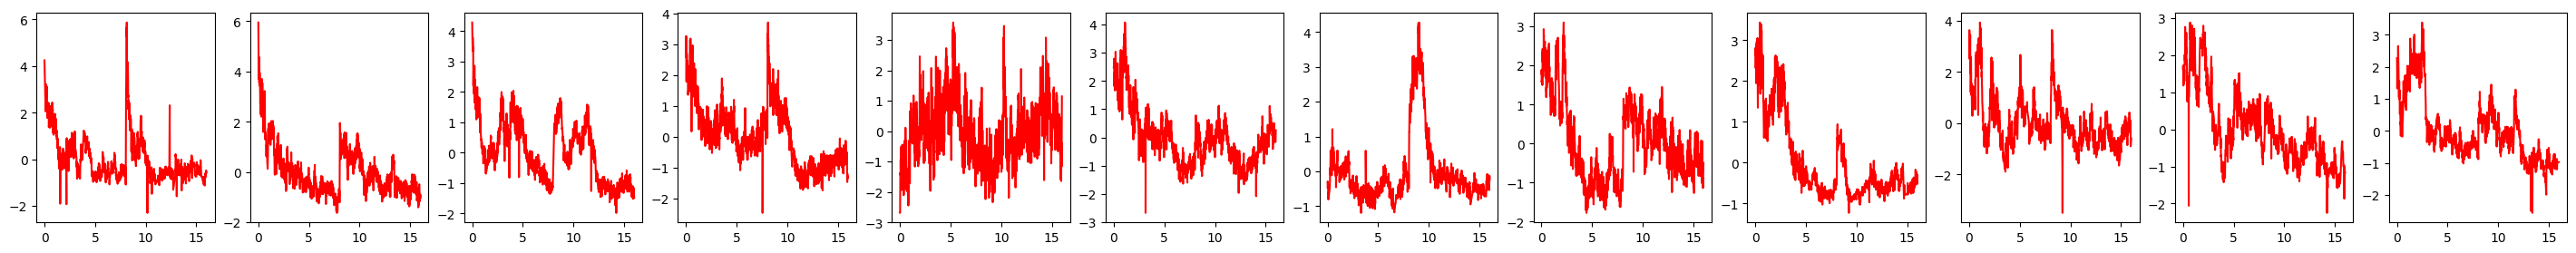

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 591.0094857759854
- 6mins - 10 mins: 254.30561257417796
- After 8 mins: 380.0891705120122

Average absolute difference within group: 
- Baseline: 1513.8192429906026
- Heat: 1324.727915558243
RIMR


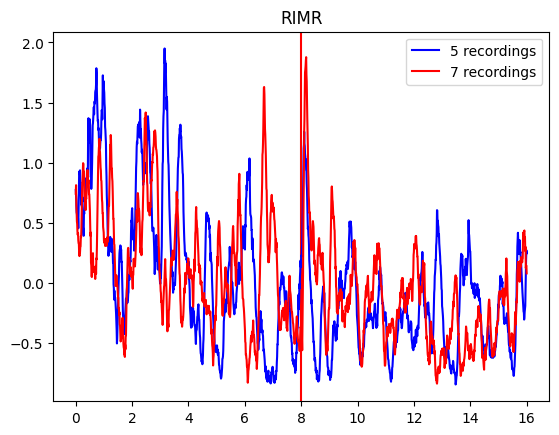

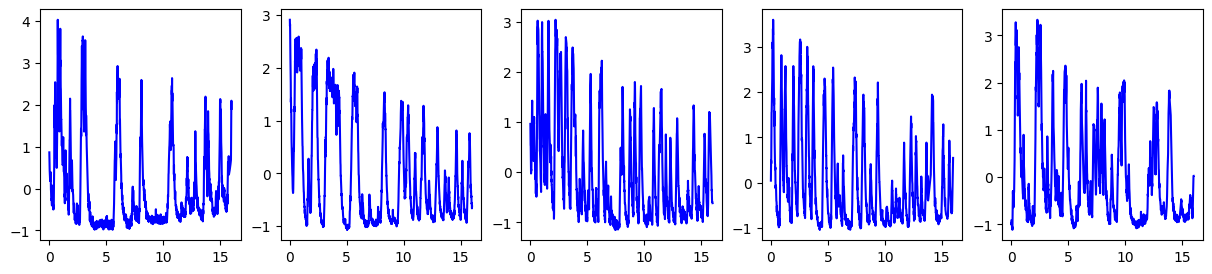

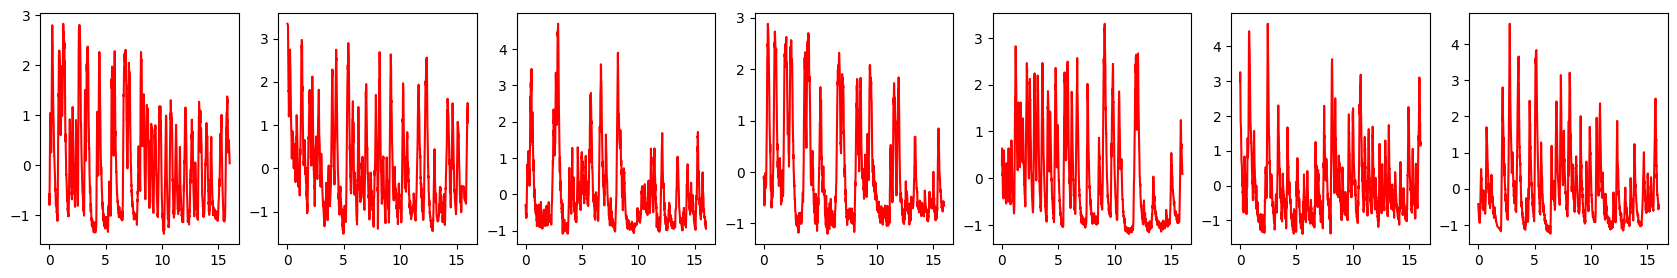

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 745.9983792779891
- 6mins - 10 mins: 243.4370155475867
- After 8 mins: 277.84851385009733

Average absolute difference within group: 
- Baseline: 1507.0529898169107
- Heat: 1629.704279580153
I2R


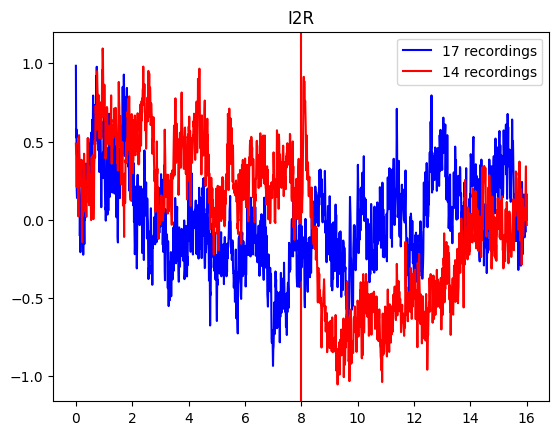

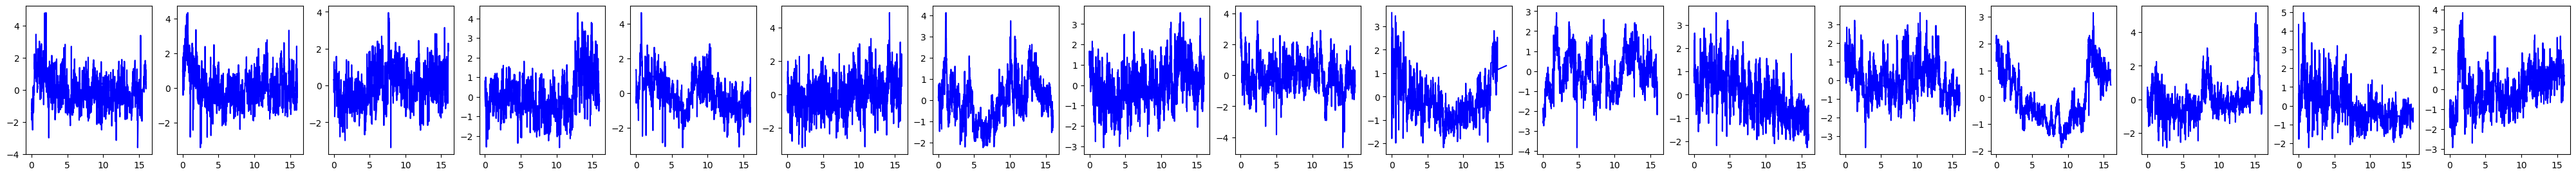

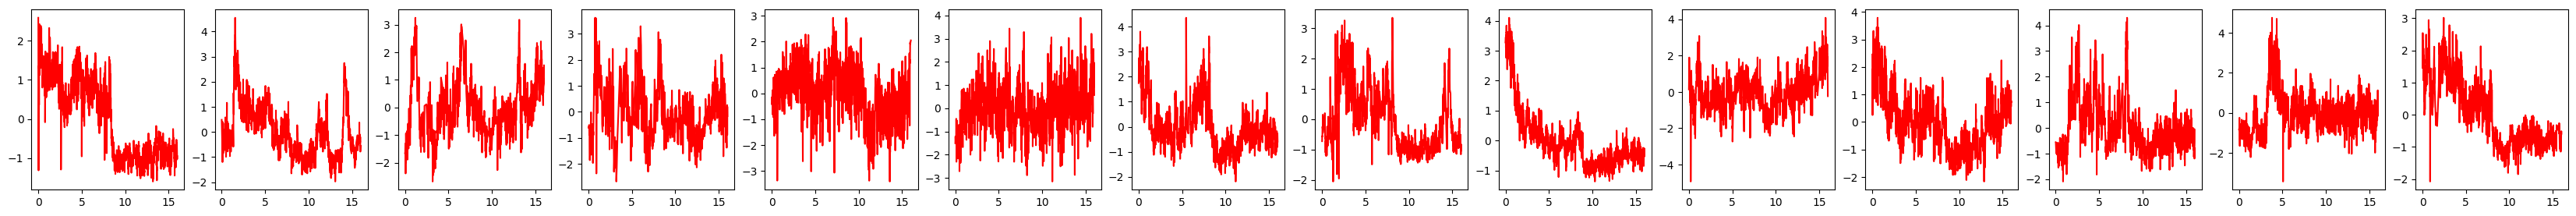

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 756.8007530835623
- 6mins - 10 mins: 218.2247285561019
- After 8 mins: 390.9635730874694

Average absolute difference within group: 
- Baseline: 1748.7396605186127
- Heat: 1575.8757240099822
AINL


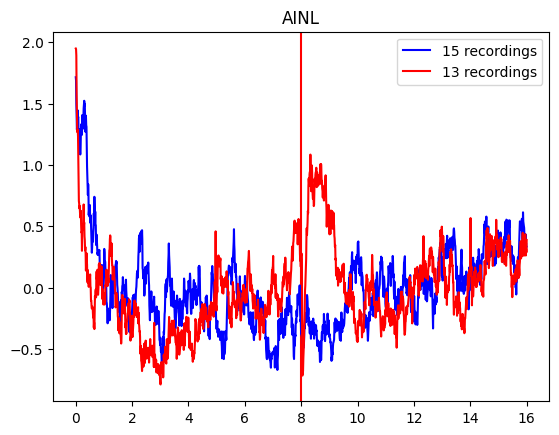

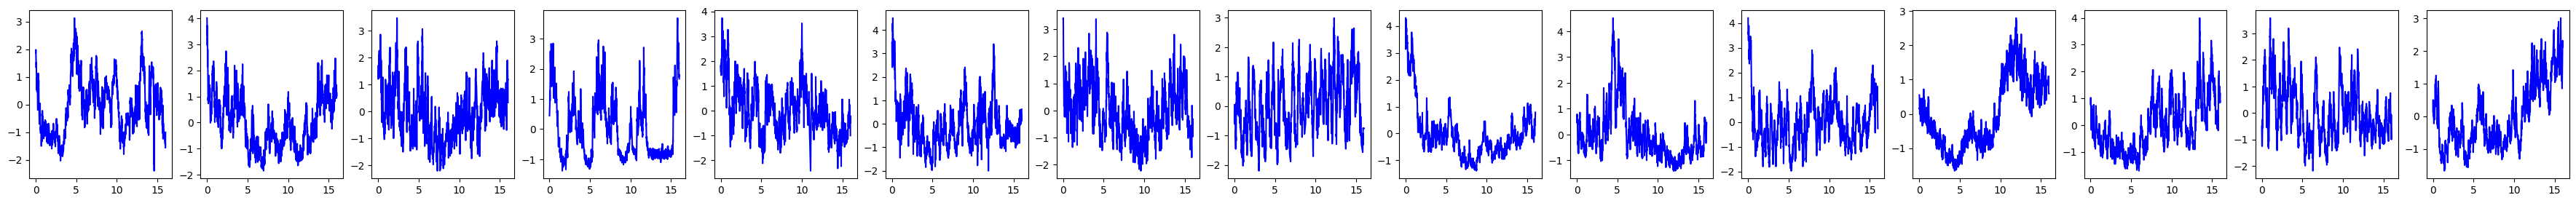

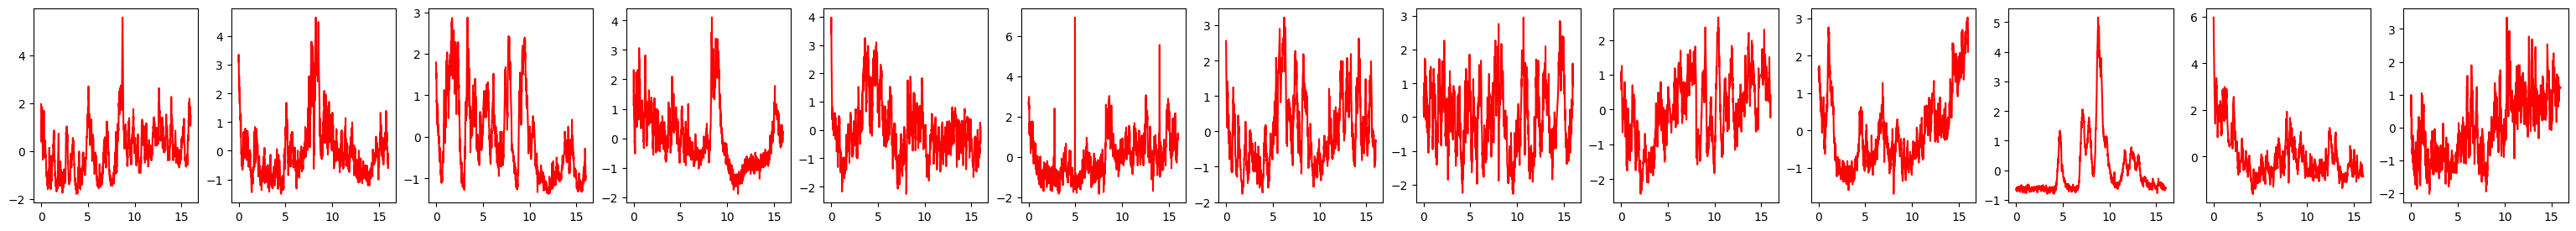

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 539.5140726615117
- 6mins - 10 mins: 214.9668152567502
- After 8 mins: 263.20195463596565

Average absolute difference within group: 
- Baseline: 1730.059775433542
- Heat: 1707.7818828511113
RIML


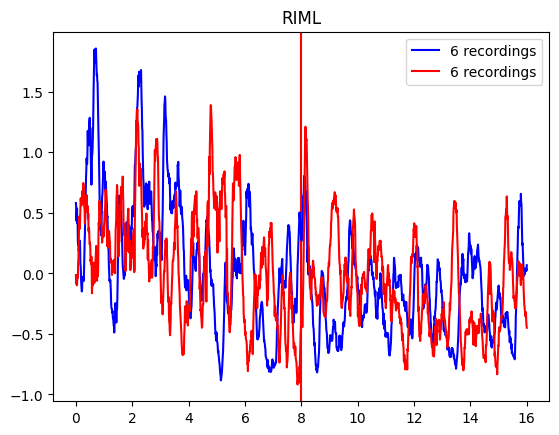

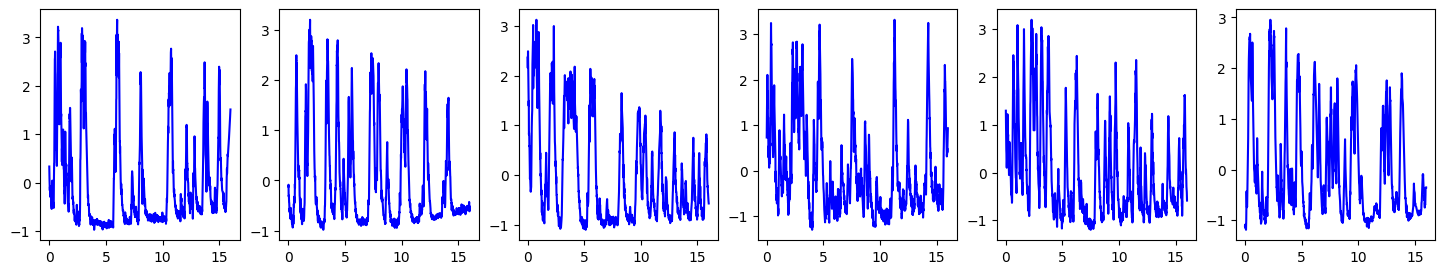

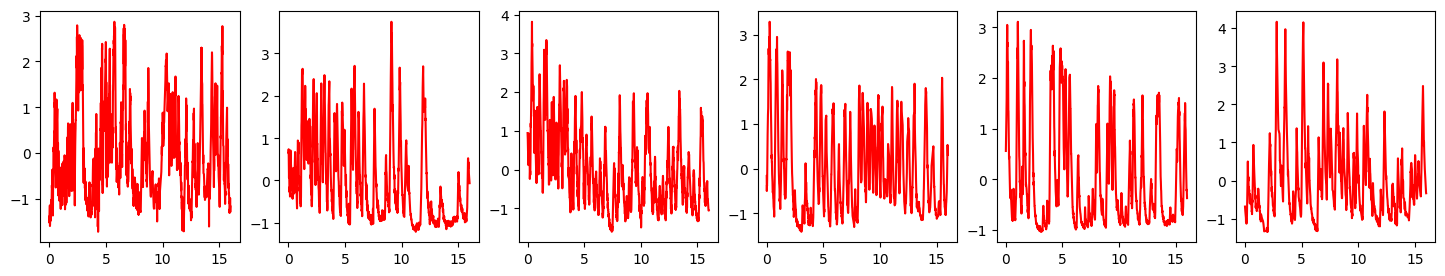

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 776.2739580887903
- 6mins - 10 mins: 214.12202721818923
- After 8 mins: 319.48057615874393

Average absolute difference within group: 
- Baseline: 1579.8739623045144
- Heat: 1728.1364661999994
AVDR


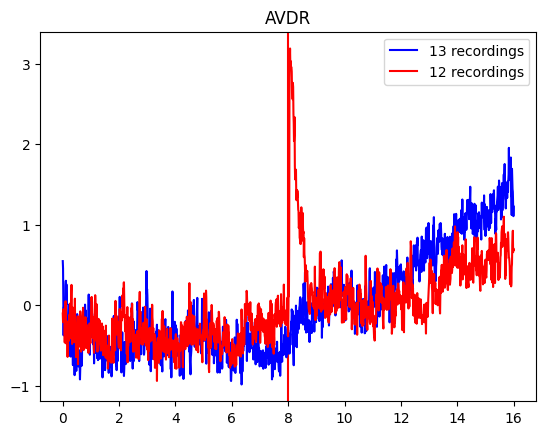

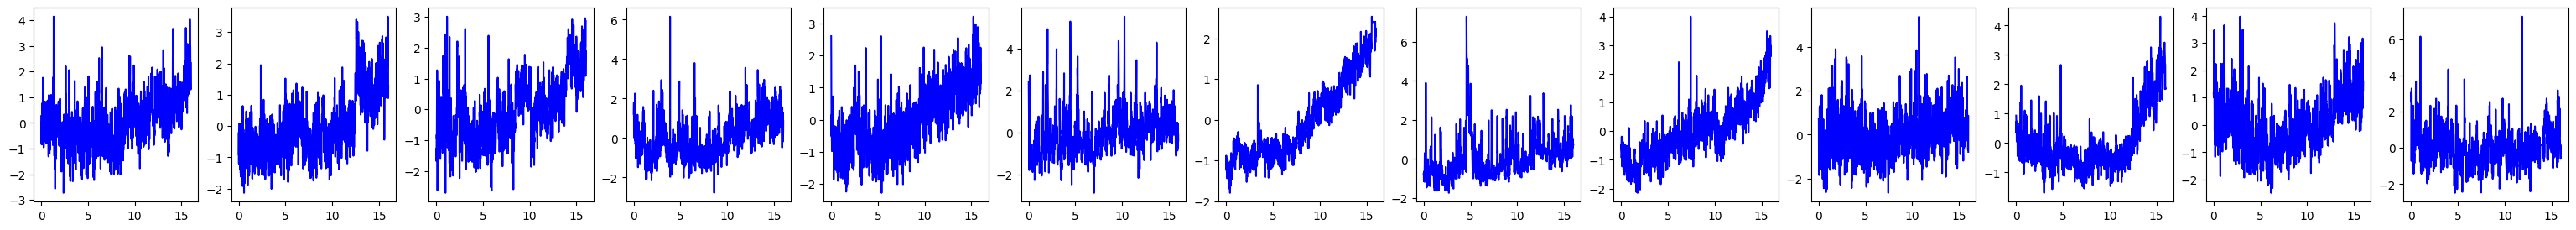

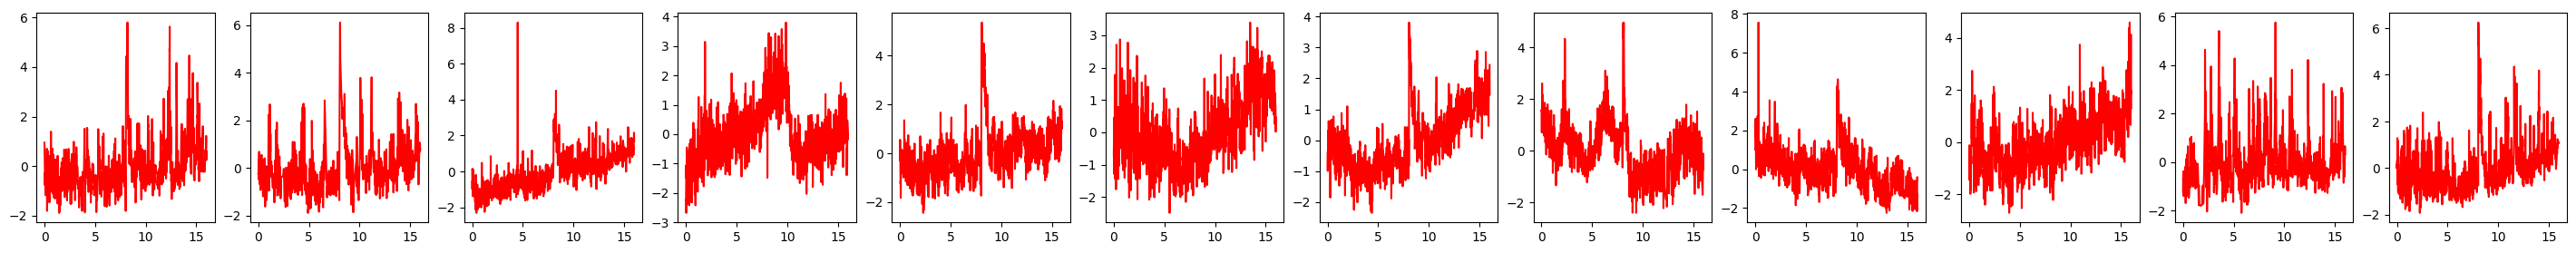

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 611.9219177374879
- 6mins - 10 mins: 205.48743466163543
- After 8 mins: 402.4789029288315

Average absolute difference within group: 
- Baseline: 1380.4907083013354
- Heat: 1554.7250199050497
AINR


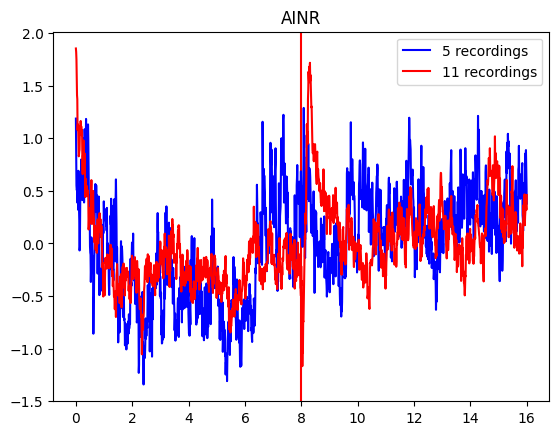

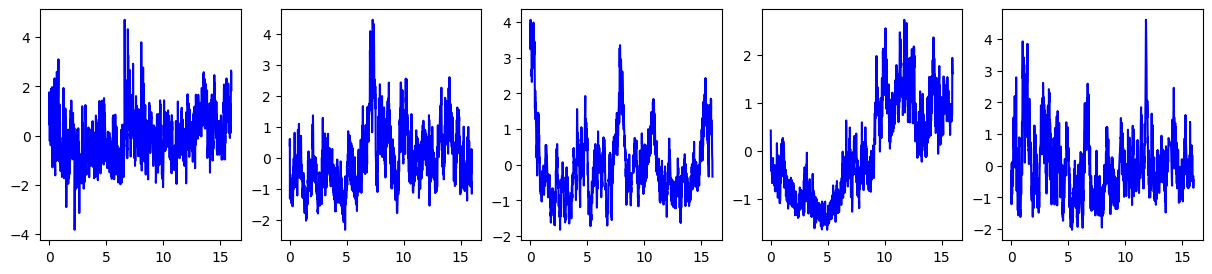

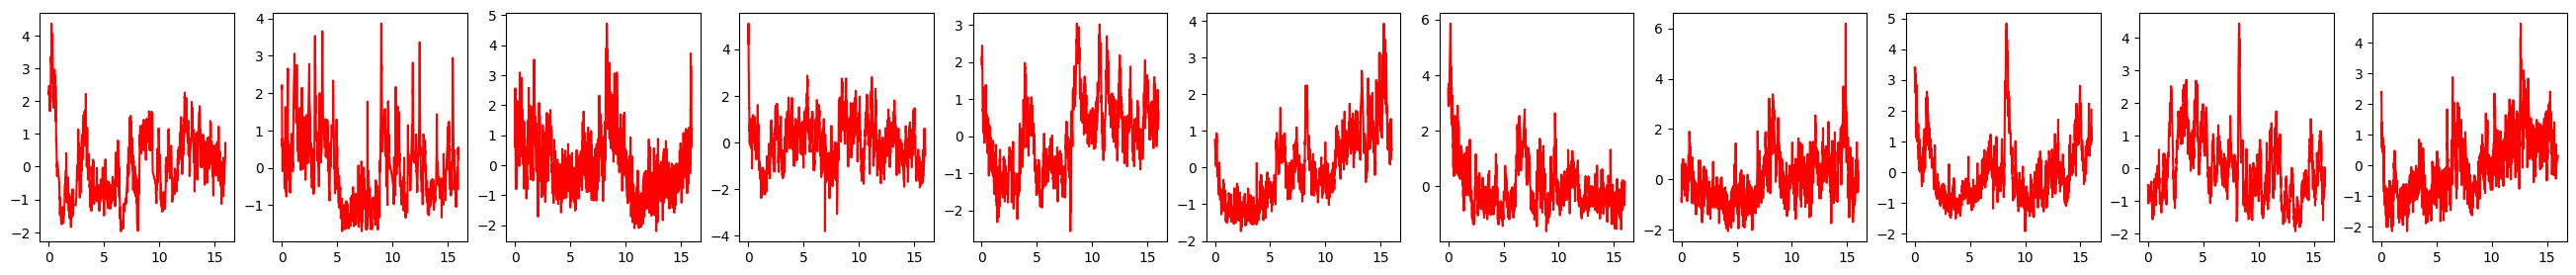

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 649.2842263394768
- 6mins - 10 mins: 202.9758856683279
- After 8 mins: 337.15698275167404

Average absolute difference within group: 
- Baseline: 1702.4172229112196
- Heat: 1712.834614620011
AQR


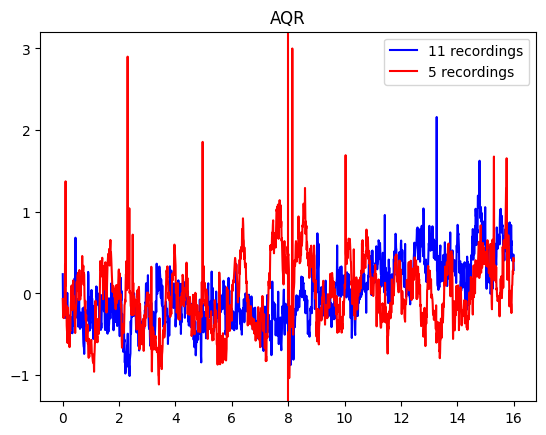

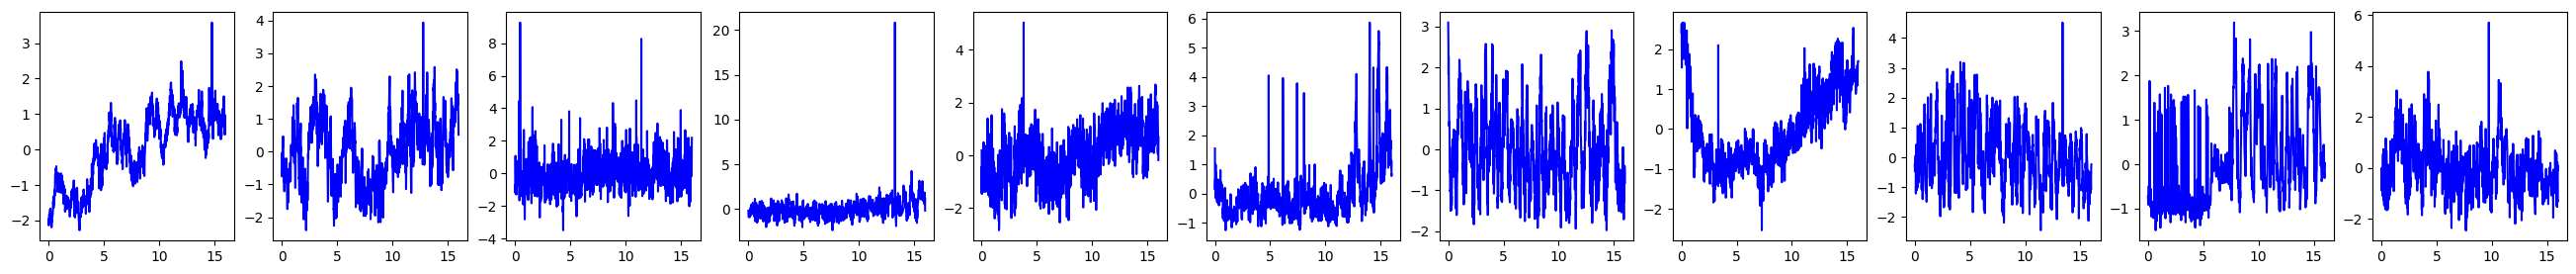

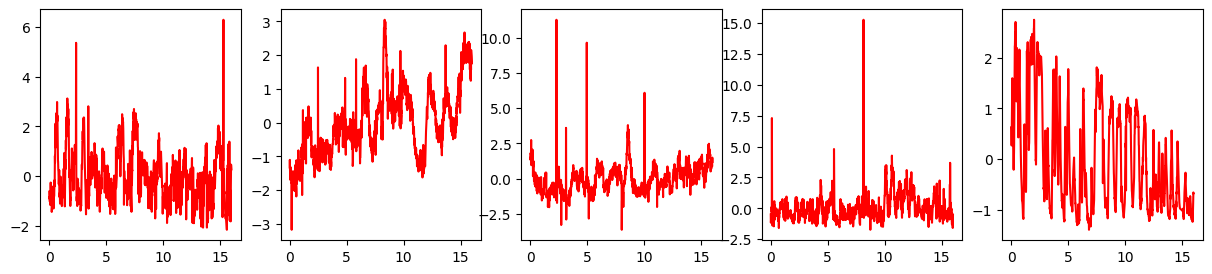

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 662.8163033052405
- 6mins - 10 mins: 202.94135707496042
- After 8 mins: 343.3467074468287

Average absolute difference within group: 
- Baseline: 1683.7851294748843
- Heat: 1750.68782551322
IL2VR


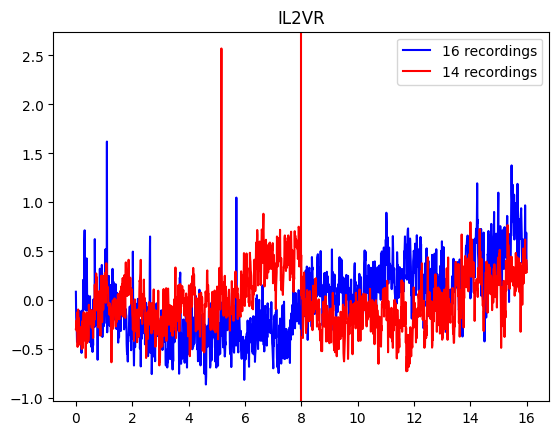

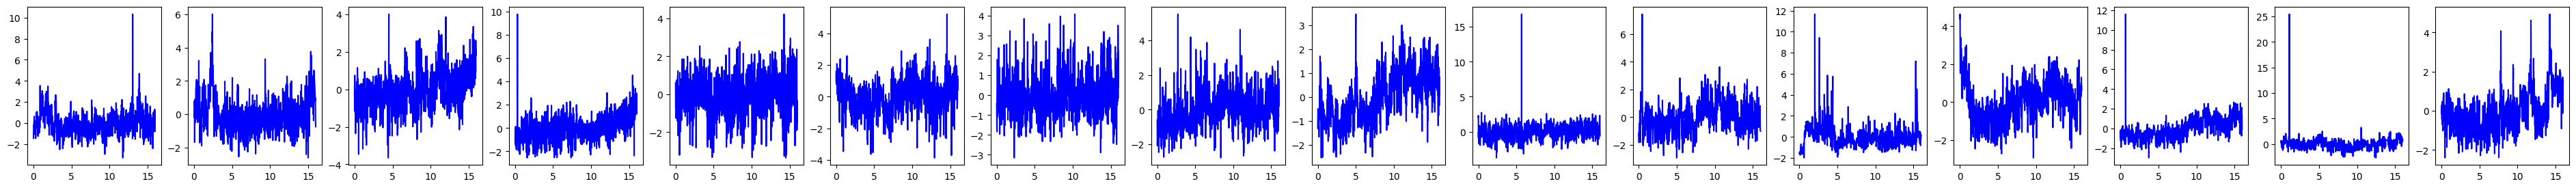

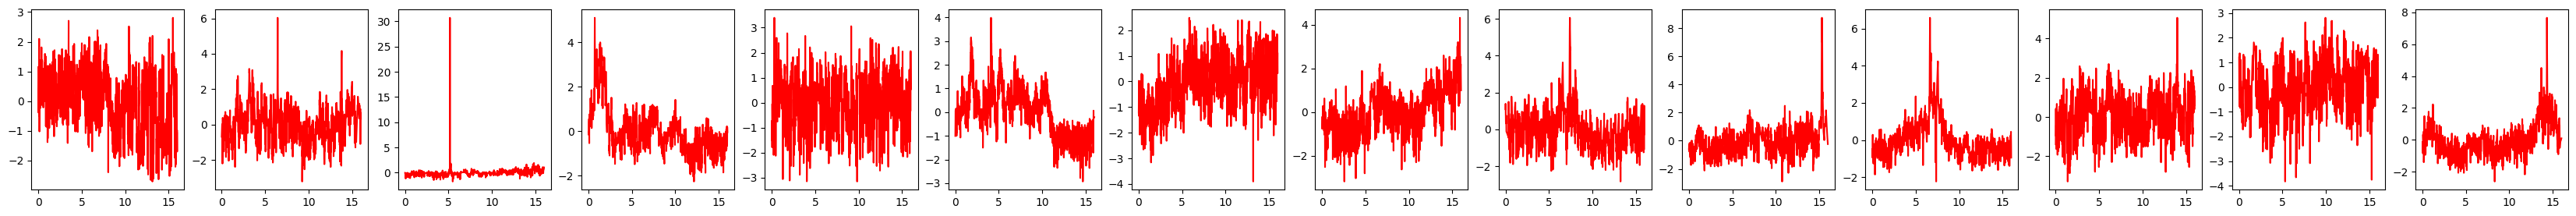

Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)
- Total: 596.2033031059365
- 6mins - 10 mins: 196.5559214303596
- After 8 mins: 283.8757517138905

Average absolute difference within group: 
- Baseline: 1644.5465351114553
- Heat: 1700.4459852543198


In [16]:
# Load baseline

labeled_neurons_base_og = {}
labeled_neurons_base_1600 = {}
timestamps_base = {}

base_neurons_recorded = set()

for json_file in os.listdir("datasets/baseline"):
    print(json_file)
    with open("datasets/baseline/" + json_file) as f:
        d = json.load(f)

    date = json_file.replace(".json", "") #filename is date
    labeled_neurons_base_og[date] = {}
    labeled_neurons_base_1600[date] = {}
    
    timestamps_relative = d["timestamp_confocal"].copy()
    for i in range(0, len(timestamps_relative)):
        timestamps_relative[i] -= d["timestamp_confocal"][0] # relative timestamps between 0 and 16 minutes
        timestamps_relative[i] /= 60 # turn seconds into minutes
    timestamps_base[date] = timestamps_relative


    for label in d["labeled"]:
        neuron_number = label # index start from 1
        neuron_index = int(neuron_number) - 1
        neuron_label = d["labeled"][str(neuron_number)]["label"] # name of neuron
        neuron_data = d["trace_array"][neuron_index] # z-scored activity data
        labeled_neurons_base_og[date][neuron_label] = neuron_data

        # turn neuron data into 1600 datapoints (100 per minute) for easy average of all datasets per neuron
        neuron_data_1600 = [None] * 1600
        og_data_index = 0
        current_1600_timestep = 0.0
        for i in range(0,1600):
            while (og_data_index < len(timestamps_base[date])) & (abs(timestamps_base[date][og_data_index] - current_1600_timestep) < abs(timestamps_base[date][og_data_index-1] - current_1600_timestep)):
                # this means we've found a timestamp within the og data matching the current 1/1600 timestep more closely
                og_data_index += 1
            neuron_data_1600[i] = neuron_data[og_data_index]
            current_1600_timestep += 0.01
        
        # normalise between 0 and 1
        #neuron_data_1600 = (neuron_data_1600-np.min(neuron_data_1600))/(np.max(neuron_data_1600)-np.min(neuron_data_1600))
        labeled_neurons_base_1600[date][neuron_label] = neuron_data_1600

        # only consider neurons we're certain about
        if '?' not in neuron_label:
            base_neurons_recorded.add(neuron_label)



# Average for baseline
            
average_base = {}
        
for neuron_name in base_neurons_recorded:
    all_datasets = []
    datasets_count = 0

    for dataset in labeled_neurons_base_1600.keys():
        if neuron_name in labeled_neurons_base_1600[dataset]:
            datasets_count += 1
            all_datasets.append(labeled_neurons_base_1600[dataset][neuron_name])
    
    if datasets_count >= 5:
        # Get average absolute difference within the baseline group for each neuron
        avg_abs_sum = np.zeros(1600)
        count = 0
        #print(neuron_name)
        for i in range(0,len(all_datasets)):
            for j in range(i+1, len(all_datasets)):
                abs_difference_between_two = np.absolute(np.array(all_datasets[i]) - np.array(all_datasets[j]))
                #print("Absolute difference between two: " + str(abs_difference_between_two))
                avg_abs_sum += abs_difference_between_two
                count += 1
        avg_abs_difference = np.divide(avg_abs_sum, count)
        #print("Average absoute difference " + str(avg_abs_difference))
        sum_avg_abs_diff = np.sum(avg_abs_difference)
        #print("Sum of the average absolute difference: " + str(sum_avg_abs_diff))
        #print("\n\n")
        

        datasets_average = np.mean(all_datasets, axis=0)
        average_base.update({neuron_name:{"dataset": datasets_average, "measurements_count": datasets_count, "avg_abs_diff_within_group":sum_avg_abs_diff}})

    else:
        average_base.update({neuron_name:{"dataset": None, "measurements_count": datasets_count, "avg_abs_diff_within_group": None}})



# Load heat
    
labeled_neurons_heat_og = {}
labeled_neurons_heat_1600 = {}
timestamps_heat = {}

heat_neurons_recorded = set()

for json_file in os.listdir("datasets/heat"):
    print(json_file)

    with open("datasets/heat/" + json_file) as f:
        d = json.load(f)

    date = json_file.replace(".json", "") #filename is date
    labeled_neurons_heat_og[date] = {}
    labeled_neurons_heat_1600[date] = {}
    
    timestamps_relative = d["timestamp_confocal"].copy()
    for i in range(0, len(timestamps_relative)):
        timestamps_relative[i] -= d["timestamp_confocal"][0] # relative timestamps between 0 and 16 minutes
        timestamps_relative[i] /= 60 # turn seconds into minutes
    timestamps_heat[date] = timestamps_relative


    for label in d["labeled"]:
        neuron_number = label # index start from 1
        neuron_index = int(neuron_number) - 1
        neuron_label = d["labeled"][str(neuron_number)]["label"] # name of neuron
        neuron_data = d["trace_array"][neuron_index] # z-scored activity data
        labeled_neurons_heat_og[date][neuron_label] = neuron_data

        # turn neuron data into 1600 datapoints (100 per minute) for easy average of all datasets per neuron
        neuron_data_1600 = [None] * 1600
        og_data_index = 0
        current_1600_timestep = 0.0
        for i in range(0,1600):
            while (og_data_index < len(timestamps_heat[date])) & (abs(timestamps_heat[date][og_data_index] - current_1600_timestep) < abs(timestamps_heat[date][og_data_index-1] - current_1600_timestep)):
                # this means we've found a timestamp within the og data matching the current 1/1600 timestep more closely
                og_data_index += 1
            neuron_data_1600[i] = neuron_data[og_data_index]
            current_1600_timestep += 0.01
        # normalise between 0 and 1
        #neuron_data_1600 = (neuron_data_1600-np.min(neuron_data_1600))/(np.max(neuron_data_1600)-np.min(neuron_data_1600))
        labeled_neurons_heat_1600[date][neuron_label] = neuron_data_1600

        # only consider neurons we're certain about
        if '?' not in neuron_label:
            heat_neurons_recorded.add(neuron_label)

        

# x_axis1 = timestamps["2022-12-21-06"]
# y_axis1 = labeled_neurons_heat_og["2022-12-21-06"][neuron_name]
# plt.plot(x_axis1, y_axis1)
# plt.plot(x_axis2, y_axis2)
# plt.title(date+ " "+neuron_name)
# plt.show()


        
# Average for heat
            
average_heat = {}
        
for neuron_name in heat_neurons_recorded:
    all_datasets = []
    datasets_count = 0

    for dataset in labeled_neurons_heat_1600.keys():
        if neuron_name in labeled_neurons_heat_1600[dataset]:
            datasets_count += 1
            all_datasets.append(labeled_neurons_heat_1600[dataset][neuron_name])

    if datasets_count >= 5:
        # Get average absolute difference within the baseline group for each neuron
        avg_abs_sum = np.zeros(1600)
        count = 0
        #print(neuron_name)
        for i in range(0,len(all_datasets)):
            for j in range(i+1, len(all_datasets)):
                abs_difference_between_two = np.absolute(np.array(all_datasets[i]) - np.array(all_datasets[j]))
                #print("Absolute difference between two: " + str(abs_difference_between_two))
                avg_abs_sum += abs_difference_between_two
                count += 1
        avg_abs_difference = np.divide(avg_abs_sum, count)
        #print("Average absoute difference " + str(avg_abs_difference))
        sum_avg_abs_diff = np.sum(avg_abs_difference)
        #print("Sum of the average absolute difference: " + str(sum_avg_abs_diff))
        #print("\n\n") 

        datasets_average = np.mean(all_datasets, axis=0)
        average_heat.update({neuron_name:{"dataset": datasets_average, "measurements_count": datasets_count, "avg_abs_diff_within_group": sum_avg_abs_diff}})
    
    else:
        average_heat.update({neuron_name:{"dataset": None, "measurements_count": datasets_count, "avg_abs_diff_within_group": None}})
    


# Calculate statistics

neurons_info = {}

for neuron_name in heat_neurons_recorded:
    if neuron_name in base_neurons_recorded:

        # only look at neurons that have at least 5 recordings within each group
        if average_base[neuron_name]["measurements_count"] < 5 or average_heat[neuron_name]["measurements_count"] < 5:
            continue

        # only look at neurons where variance between groups is bigger than variance within group

        # print the abs difference between 6 and 10 mins
        # ^ order by this
        # OR order them by the biggest difference in absolute difference within groups vs between groups
        # print the abs difference in total
        # and the difference between 8 and end
        # the average difference between individuals within a group (how?)
        # all the individual meaurements in rows, baseline with blue on top and heat with red on bottom
        # info about the top 10 neurons

        # what if theres just like one spike, so the area difference is not big

        abs_diff_6_10 = 0 
        abs_diff_total = 0
        abs_diff_8_16 = 0
        for i in range(0,1600):
            abs_diff_total += abs(average_base[neuron_name]["dataset"][i] - average_heat[neuron_name]["dataset"][i])
            if i > 600 and i < 1000:
                abs_diff_6_10 += abs(average_base[neuron_name]["dataset"][i] - average_heat[neuron_name]["dataset"][i])
            if i > 800:
                abs_diff_8_16 += abs(average_base[neuron_name]["dataset"][i] - average_heat[neuron_name]["dataset"][i])

        neurons_info.update({neuron_name:{"absolute_difference_total":abs_diff_total, "absolute_difference_6_10":abs_diff_6_10, "absolute_difference_8_16":abs_diff_8_16}})



# Display the stats and other info
        
timestamps_1600 = np.linspace(0, 16, num=1600)

# Sort by highest absolute difference 6min-10min between heat and base
sorted_neurons = sorted(neurons_info.items(), key = lambda x:neurons_info[x[0]]["absolute_difference_6_10"], reverse=True)

#only show the top 10 neurons
neurons_to_show = 10

for neuron in sorted_neurons:

    neurons_to_show-=1
    if neurons_to_show<=0: break # show top 10 neurons

    neuron_name = neuron[0]
    print(neuron_name)
    
    x_axis_b = timestamps_1600
    y_axis_b = average_base[neuron_name]["dataset"]

    x_axis_h = timestamps_1600
    y_axis_h = average_heat[neuron_name]["dataset"]
    plt.axvline(x = 8, color = 'r')
    plt.title(neuron_name)
    plt.plot(x_axis_b, y_axis_b, color = "blue", label = str(average_base[neuron_name]["measurements_count"]) + " recordings")
    plt.plot(x_axis_h, y_axis_h, color = "red", label = str(average_heat[neuron_name]["measurements_count"]) + " recordings")
    plt.legend()
    plt.show()

    # all individual measurements
    # baseline
    col_counter = 0 # to display plots side by side
    datasets_count = average_base[neuron_name]["measurements_count"]
    fig, axes = plt.subplots(nrows=1, ncols=datasets_count, figsize=(3*datasets_count, 3))

    for dataset in labeled_neurons_base_1600:
        if neuron_name not in labeled_neurons_base_1600[dataset]: continue

        axes[col_counter].plot(timestamps_1600, labeled_neurons_base_1600[dataset][neuron_name], color="blue")

        # plt.subplot(1, timestamps_1600, labeled_neurons_base_1600[dataset][neuron_name])
        # plt.axvline(x = 8, color = 'r')
        # plt.plot(x_axis, y_axis, color = "blue")
        # plt.title(dataset)
        col_counter += 1

    plt.show()

    # heat
    col_counter = 0 # to display plots side by side
    datasets_count = average_heat[neuron_name]["measurements_count"]
    fig, axes = plt.subplots(nrows=1, ncols=datasets_count, figsize=(3*datasets_count, 3))
    for dataset in labeled_neurons_heat_1600:
        if neuron_name not in labeled_neurons_heat_1600[dataset]: continue

        axes[col_counter].plot(timestamps_1600, labeled_neurons_heat_1600[dataset][neuron_name], color="red")

        # plt.subplot(1, timestamps_1600, labeled_neurons_heat_1600[dataset][neuron_name])
        # plt.axvline(x = 8, color = 'r')
        # plt.plot(x_axis, y_axis, color = "blue")
        # plt.title(dataset)
        col_counter += 1
    plt.show()

    print("Absolute difference between avg heat and avg baseline: (doesn't detect spikes much, just general change in pattern?)")
    print("- Total: " + str(neurons_info[neuron_name]["absolute_difference_total"]))
    print("- 6mins - 10 mins: " + str(neurons_info[neuron_name]["absolute_difference_6_10"]))
    print("- After 8 mins: " + str(neurons_info[neuron_name]["absolute_difference_8_16"]))

    print("\nAverage absolute difference within group: ")
    print("- Baseline: " + str(average_base[neuron_name]["avg_abs_diff_within_group"]))
    print("- Heat: " + str(average_heat[neuron_name]["avg_abs_diff_within_group"]))

    # print("\n\n")
    # print("Variance within group: ")
    # print("Variane between groups (heat vs baseline): ")

KS test for window of 10 seconds
Neurons with p-value < 0.05: 
I2L
I2R
CEPVR
AVL
M4
IL1DR
IL2DL
OLQVR
RMDVL
IL2VL
IL1DL
AWAR
IL2VR
remaining:
OLQDL


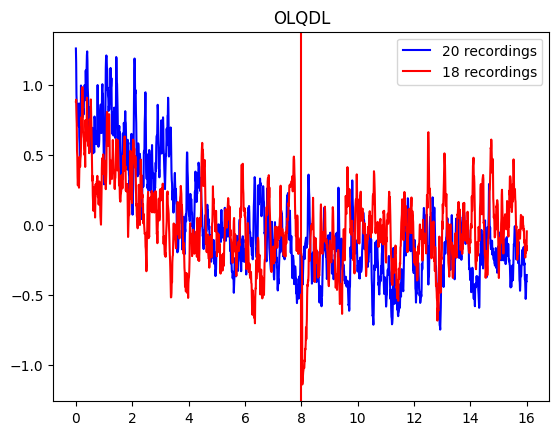

AWBL


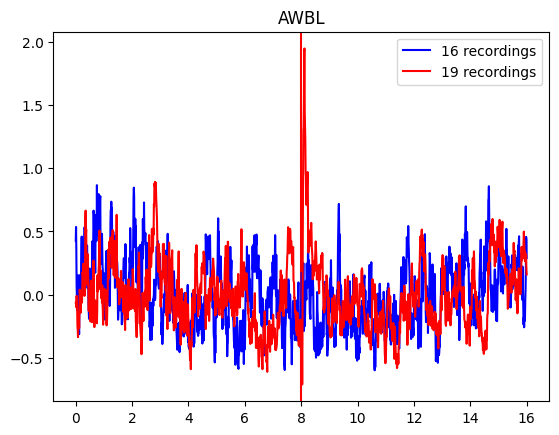

ASEL


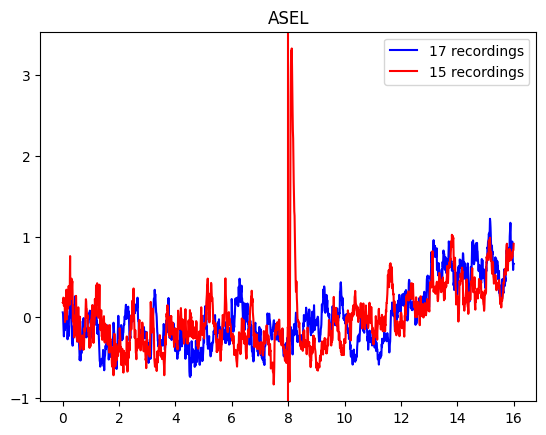

FLPL


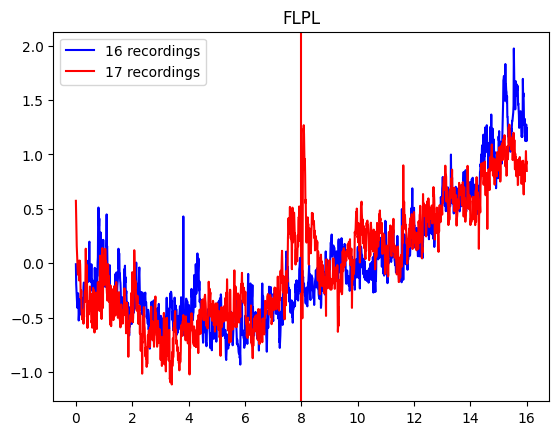

ADAL


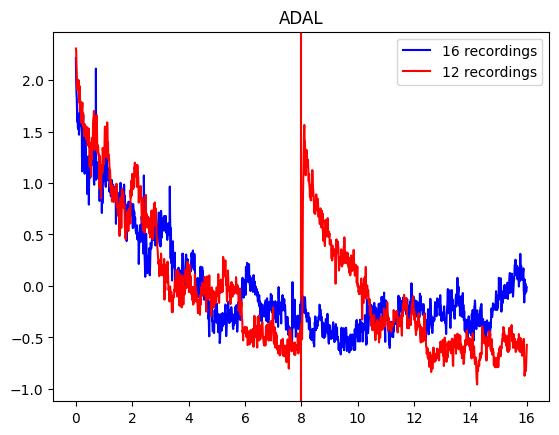

OLQVL


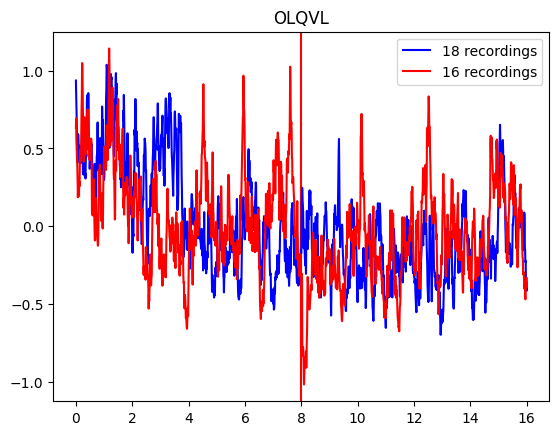

URYDL


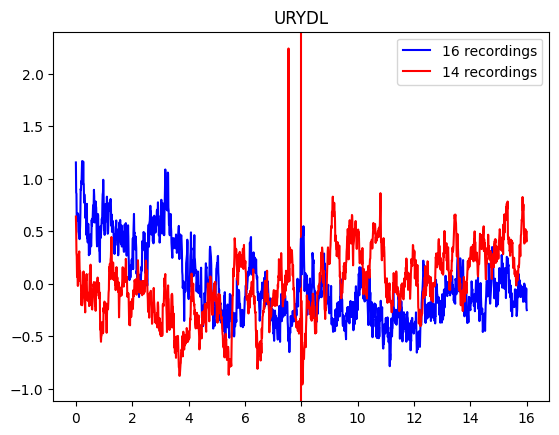

AUAL


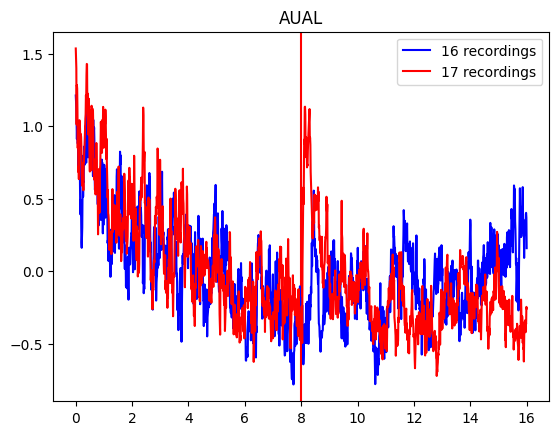

OLLL


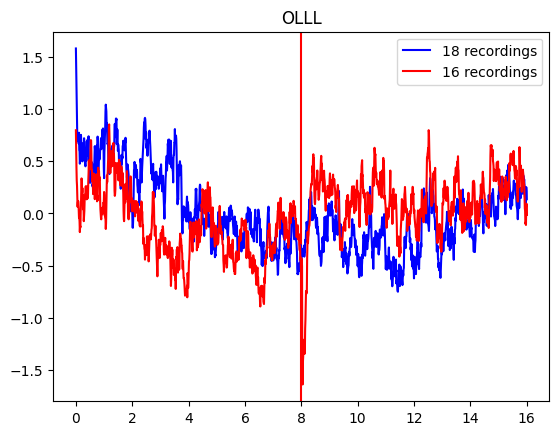

RMDL


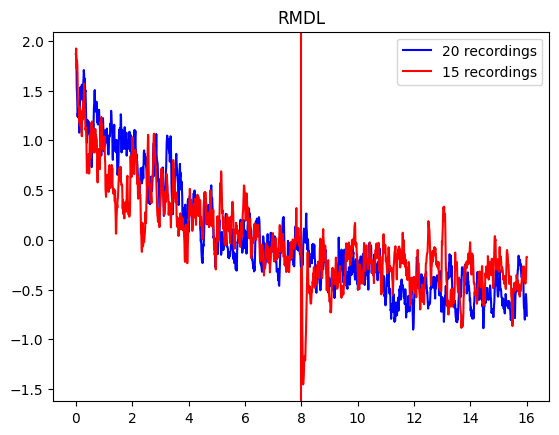

AVJR


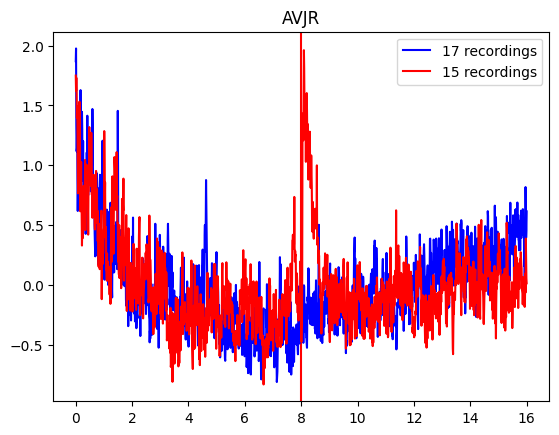

URYDR


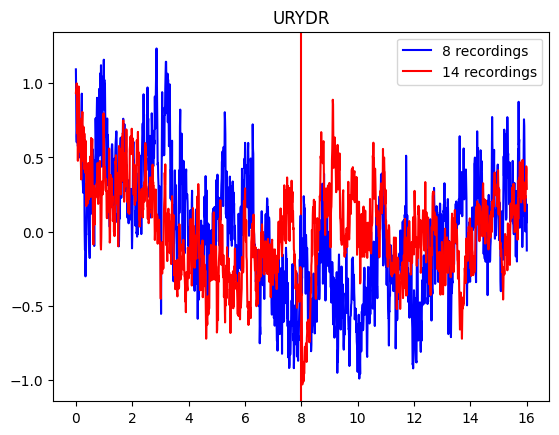

AVDL


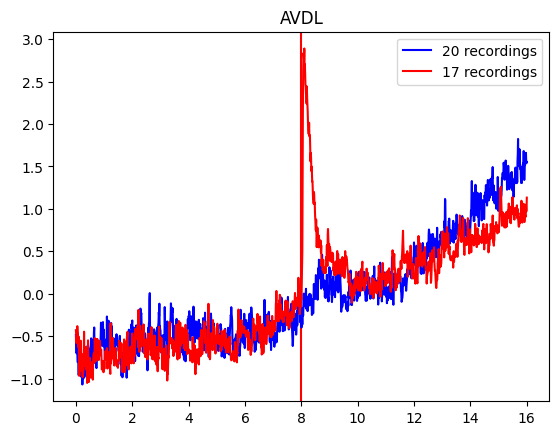

FLPR


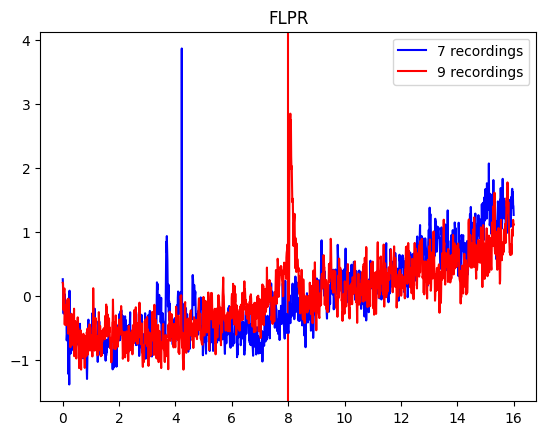

I3


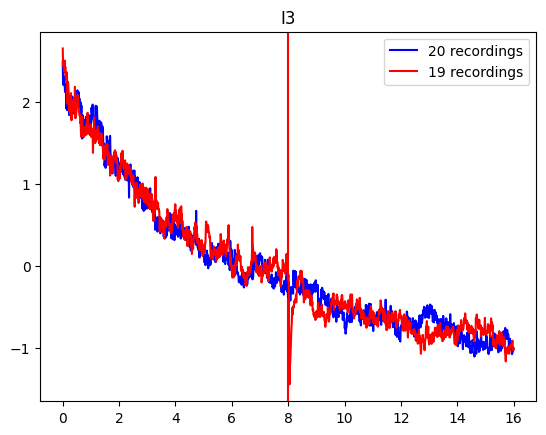

AVJL


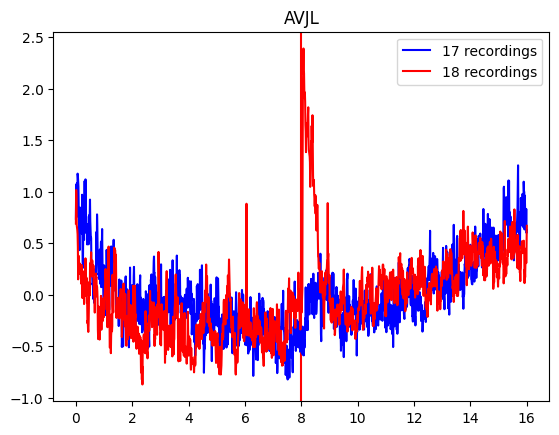

AVDR


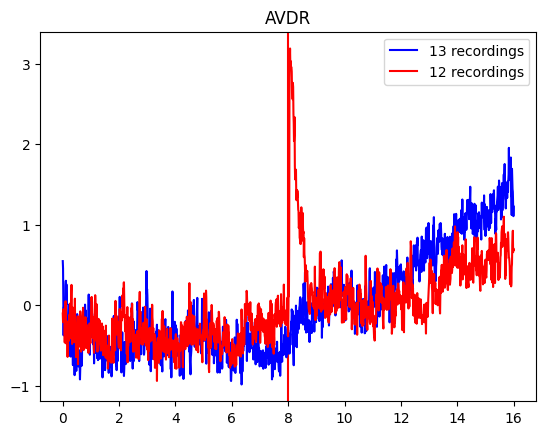

OLQDR


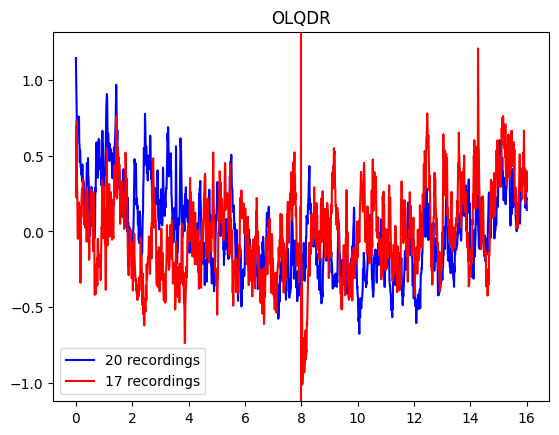

URYVL


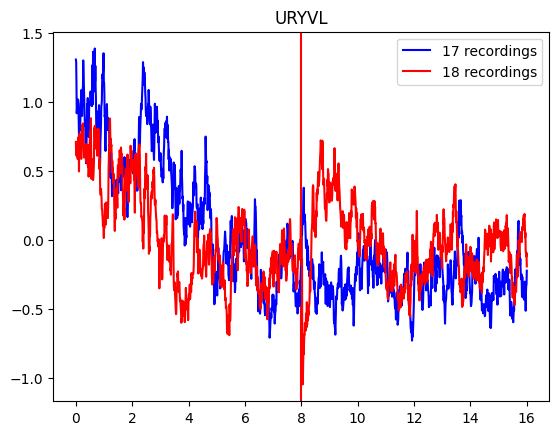

URYVR


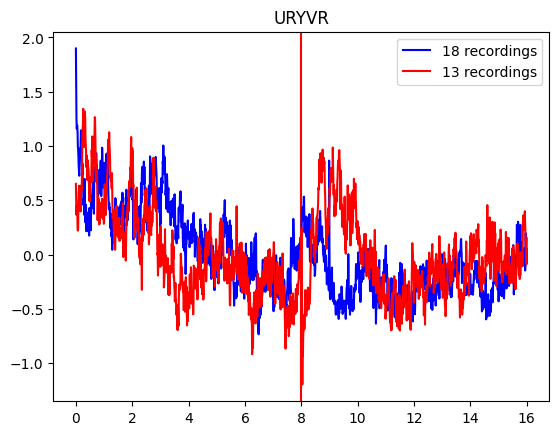

RIAR


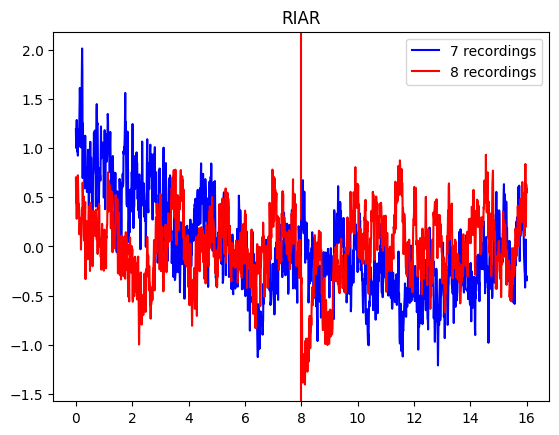

In [32]:
# KS test

from scipy.stats import ks_2samp

window_size = 10 # window size for the average of values after the stimuli, in seconds
print("KS test for window of " + str(window_size) + " seconds")
window_size = round(window_size * 100/60) # convert to index range in data array, where 100 indeces = 60 seconds

KS_results = {}

# go one by one through neurons, calculate averages and KS test for each


print("Neurons with p-value < 0.05: ")

for neuron_name in heat_neurons_recorded:
    if neuron_name in base_neurons_recorded:

        # only look at neurons that have at least 5 recordings within each group
        if average_base[neuron_name]["measurements_count"] < 5 or average_heat[neuron_name]["measurements_count"] < 5:
            continue

        array_avgs_base = []
        array_avgs_heat = []

        # calculate KS test for the time in 2 windows before stimuli as well, to eliminate neurons that give low p-values for both due to high variability within them
        array_avgs_base_before_stimuli1 = []
        array_avgs_heat_before_stimuli1 = []
        array_avgs_base_before_stimuli2 = []
        array_avgs_heat_before_stimuli2 = []

        for dataset in labeled_neurons_base_1600:
            if neuron_name not in labeled_neurons_base_1600[dataset]: continue

            sum_base = 0
            for i in range(800, 800+window_size):
                sum_base += labeled_neurons_base_1600[dataset][neuron_name][i]
            array_avgs_base.append(sum_base/window_size)

            sum_base_before_stimuli1 = 0
            for i in range(800-50-window_size, 800-50):
                sum_base_before_stimuli1 += labeled_neurons_base_1600[dataset][neuron_name][i]
            array_avgs_base_before_stimuli1.append(sum_base_before_stimuli1/window_size)

            sum_base_before_stimuli2 = 0
            for i in range(0, window_size):
                sum_base_before_stimuli2 += labeled_neurons_base_1600[dataset][neuron_name][i]
            array_avgs_base_before_stimuli2.append(sum_base_before_stimuli2/window_size)

        
        for dataset in labeled_neurons_heat_1600:
            if neuron_name not in labeled_neurons_heat_1600[dataset]: continue

            sum_heat = 0
            for i in range(800, 800+window_size):
                sum_heat += labeled_neurons_heat_1600[dataset][neuron_name][i]
            array_avgs_heat.append(sum_heat/window_size)

            sum_heat_before_stimuli1 = 0
            for i in range(800-50-window_size, 800-50):
                sum_heat_before_stimuli1 += labeled_neurons_heat_1600[dataset][neuron_name][i]
            array_avgs_heat_before_stimuli1.append(sum_heat_before_stimuli1/window_size)

            sum_heat_before_stimuli2 = 0
            for i in range(0, window_size):
                sum_heat_before_stimuli2 += labeled_neurons_heat_1600[dataset][neuron_name][i]
            array_avgs_heat_before_stimuli2.append(sum_heat_before_stimuli2/window_size)
        
        ks_result_before_stimuli1 = ks_2samp(array_avgs_base_before_stimuli1, array_avgs_heat_before_stimuli1)
        ks_result_before_stimuli2 = ks_2samp(array_avgs_base_before_stimuli2, array_avgs_heat_before_stimuli2)
        ks_result = ks_2samp(array_avgs_base, array_avgs_heat)
        if(ks_result_before_stimuli1.pvalue < 0.05):
            print(neuron_name)

        if(ks_result.pvalue < 0.01 and ks_result_before_stimuli1.pvalue > 0.05 and ks_result_before_stimuli2.pvalue > 0.05):
            KS_results[neuron_name] = {"statistic": ks_result.statistic, "pvalue": ks_result.pvalue}
            
print("remaining:")
for neuron in KS_results:
    print(neuron)
    x_axis_b = timestamps_1600
    # display the graphs for this neuron
    y_axis_b = average_base[neuron]["dataset"]
    x_axis_h = timestamps_1600
    y_axis_h = average_heat[neuron]["dataset"]
    plt.axvline(x = 8, color = 'r')
    plt.title(neuron)
    plt.plot(x_axis_b, y_axis_b, color = "blue", label = str(average_base[neuron]["measurements_count"]) + " recordings")
    plt.plot(x_axis_h, y_axis_h, color = "red", label = str(average_heat[neuron]["measurements_count"]) + " recordings")
    plt.legend()
    plt.show()







            # x_axis_b = timestamps_1600

            # # display the graphs for this neuron
            # y_axis_b = average_base[neuron_name]["dataset"]
            # x_axis_h = timestamps_1600
            # y_axis_h = average_heat[neuron_name]["dataset"]
            # plt.axvline(x = 8, color = 'r')
            # plt.title(neuron_name)
            # plt.plot(x_axis_b, y_axis_b, color = "blue", label = str(average_base[neuron_name]["measurements_count"]) + " recordings")
            # plt.plot(x_axis_h, y_axis_h, color = "red", label = str(average_heat[neuron_name]["measurements_count"]) + " recordings")
            # plt.legend()
            # plt.show()

            # # all individual measurements
            # # baseline
            # col_counter = 0 # to display plots side by side
            # datasets_count = average_base[neuron_name]["measurements_count"]
            # fig, axes = plt.subplots(nrows=1, ncols=datasets_count, figsize=(3*datasets_count, 3))

            # for dataset in labeled_neurons_base_1600:
            #     if neuron_name not in labeled_neurons_base_1600[dataset]: continue

            #     axes[col_counter].plot(timestamps_1600, labeled_neurons_base_1600[dataset][neuron_name], color="blue")
            #     col_counter += 1

            # plt.show()

            # # heat
            # col_counter = 0 # to display plots side by side
            # datasets_count = average_heat[neuron_name]["measurements_count"]
            # fig, axes = plt.subplots(nrows=1, ncols=datasets_count, figsize=(3*datasets_count, 3))
            # for dataset in labeled_neurons_heat_1600:
            #     if neuron_name not in labeled_neurons_heat_1600[dataset]: continue

            #     axes[col_counter].plot(timestamps_1600, labeled_neurons_heat_1600[dataset][neuron_name], color="red")
            #     col_counter += 1
            # plt.show()
